# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** A. Fauzan Adhima
- **Email:** fauzan.adh187@gmail.com
- **ID Dicoding:** adhimaaa


## Menentukan Pertanyaan Bisnis


- Pada tanggal berapa masing-masing rental keseluruhan, rental casual, dan rental registered paling banyak dan paling sedikit dilakukan pada periode 2011-2012?
- Kondisi cuaca seperti apa dengan rental paling banyak dan paling sedikit pada periode 2011-2012?
  - Pada musim apa rental paling banyak dan paling sedikit dilakukan selama periode 2011-2012?
  - Bagaimana korelasi temperatur, temperatur yang dirasakan kelembapan, dan kecepatan angin dengan banyak rental harian yang dilakukan selama periode 2011-2012?
- Bagaimana tren bulanan rental selama 2011-2012?
- Bagaimana tren bulanan rental registered selama 2011-2012?


## Import Semua Packages/Library yang Digunakan


In [2]:
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data


In [3]:
day_df = pd.read_csv(".\data\day.csv")
hour_df = pd.read_csv(".\data\hour.csv")

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- Data terdiri atas 2 file csv, day.csv dan hour.csv
- Data dimuat ke dalam format dataframe yang masing-masing bernama day_df dan hour_df
- hour_df menggunakan sampling per jam, sementara day_df sampling per hari. hour_df dan day_df dibedakan dengan keberadaan kolom "hr" pada hour_df yang berisi data jam dari entri data


### Assessing Data


In [6]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print(
    f"Jumlah hari dalam periode 2011-2012 (2012 adalah tahun kabisat) = {365 * 2 + 1}"
)

Jumlah hari dalam periode 2011-2012 (2012 adalah tahun kabisat) = 731


In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
day_df.duplicated().sum()

np.int64(0)

In [11]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
print(f"Jumlah jam dalam periode 2011-2012 = {731 * 24}")

Jumlah jam dalam periode 2011-2012 = 17544


In [15]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
hour_df.duplicated().sum()

np.int64(0)

In [17]:
day_df_desc = day_df.describe(include="all").transpose()
day_df_desc["unique_values"] = [day_df[col].nunique() for col in day_df.columns]
day_df_desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,unique_values
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0,731
dteday,731,731,2012-12-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0,4
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0,2
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0,12
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0,2
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0,7
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0,2
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0,3
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667,499


In [18]:
hour_df_desc = hour_df.describe(include="all").transpose()
hour_df_desc["unique_values"] = [hour_df[col].nunique() for col in hour_df.columns]
hour_df_desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,unique_values
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0,17379
dteday,17379,731,2012-12-31,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0,4
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0,2
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0,12
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0,24
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0,2
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0,7
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0,2
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0,4


In [19]:
print(hour_df.cnt.sum() == day_df.cnt.sum())

True


Meskipun record tidak lengkap, jumlah rental sama antara data per jam (hour_df) dan data per hari (day_df). Ini berarti kemungkinan tidak ada rental yang dilakukan pada record/jam yang tidak ada. Namun, hal ini perlu dikonfirmasi lebih lanjut untuk disimpulkan


**Insight:**

- day.csv berisi data yang lengkap, meng-cover sepanjang tahun 2011 dan 2012, tidak ada missing value dan duplicate value
- hour.csv, meskipun tidak ada missing value dan duplicate value, record tidak lengkap. Beberapa jam pada beberapa tanggal tidak ada datanya
- Data pada kolom "dteday" untuk masing-masing dataframe memiliki tipe yang kurang tepat. Data pada kolom tersebut merepresentasikan tanggal dan sebaiknya bertipe datetime
- Terdapat perbedaan nilai maksimum kolom "weathersit" pada day_df dan hour_df. Hal ini mungkin terjadi karena perbedaan sampling dan perhitungan pada sumber data (http://www.freemeteo.com)
- Berdasarkan statistik deskriptif yang dilakukan dengan method "describe" dan beberapa modifikasi seperti ditunjukkan pada cell ke-22 dan ke-23, nilai-nilai pada tiap kolom sudah sesuai


### Cleaning Data


In [20]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [22]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

- Tipe data nilai pada kolom "dteday" diubah menjadi tipe data yang lebih tepat, yaitu datetime
- Untuk pertanyaan analisis yang dibuat, ketidaklengkapan record bisa saja tidak ditangani. Namun, ketidaklengkapan record mungkin perlu ditangani untuk menjawab pertanyaan analisis lain, contohnya untuk melihat tren rental per jam


## Exploratory Data Analysis (EDA)


### Explore descriptive statistic of data


In [24]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [25]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Explore categorical data


In [26]:
day_df[day_df["cnt"] == day_df.cnt.max()][["dteday"]]

,dteday
623,2012-09-15


In [27]:
day_df[day_df["cnt"] == day_df.cnt.min()][["dteday"]]

,dteday
667,2012-10-29


In [28]:
day_df[day_df["casual"] == day_df.casual.max()][["dteday"]]

,dteday
504,2012-05-19


In [29]:
day_df[day_df["casual"] == day_df.casual.min()][["dteday"]]

,dteday
667,2012-10-29


In [30]:
day_df[day_df["registered"] == day_df.registered.max()][["dteday"]]

,dteday
634,2012-09-26


In [31]:
day_df[day_df["registered"] == day_df.registered.min()][["dteday"]]

,dteday
667,2012-10-29


In [32]:
day_df_2011 = day_df[day_df["yr"] == 0]
day_df_2011.groupby(by="season").agg(
    {"casual": "sum", "registered": "sum", "cnt": "sum"}
).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
season,,,
3,95450,324200,419650
2,77564,269752,347316
4,52813,273324,326137
1,21425,128575,150000


In [33]:
day_df_2012 = day_df[day_df["yr"] != 0]
day_df_2012.groupby(by="season").agg(
    {"casual": "sum", "registered": "sum", "cnt": "sum"}
).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
season,,,
3,130641,510838,641479
2,125958,445315,571273
4,76969,438507,515476
1,39197,282151,321348


### Explore trend


In [34]:
monthly_df = day_df.resample(rule="ME", on="dteday").agg(
    {"registered": "sum", "cnt": "sum"}
)

monthly_df.index = monthly_df.index.strftime("%Y-%m")
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={"dteday": "month"}, inplace=True)
monthly_df.sort_values(by='cnt', ascending=False)

,month,registered,cnt
20,2012-09,174795,218573
19,2012-08,171306,214503
18,2012-07,161902,203607
17,2012-06,159536,202830
21,2012-10,164303,198841
16,2012-05,151630,195865
15,2012-04,135768,174224
14,2012-03,133257,164875
22,2012-11,131655,152664
5,2011-06,112900,143512


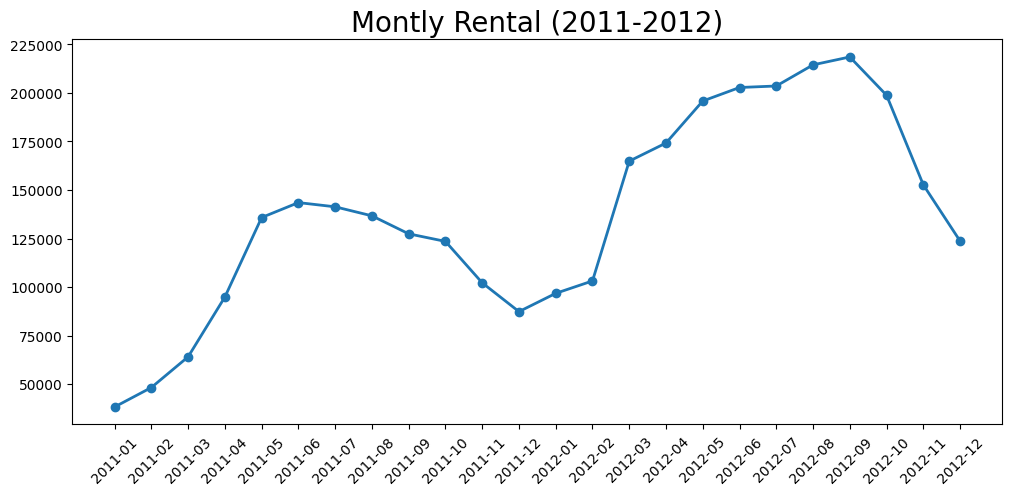

In [35]:
%matplotlib inline

plt.figure(figsize=(12, 5))
plt.plot(monthly_df["month"], monthly_df["cnt"], marker="o", linewidth=2)
plt.title("Montly Rental (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

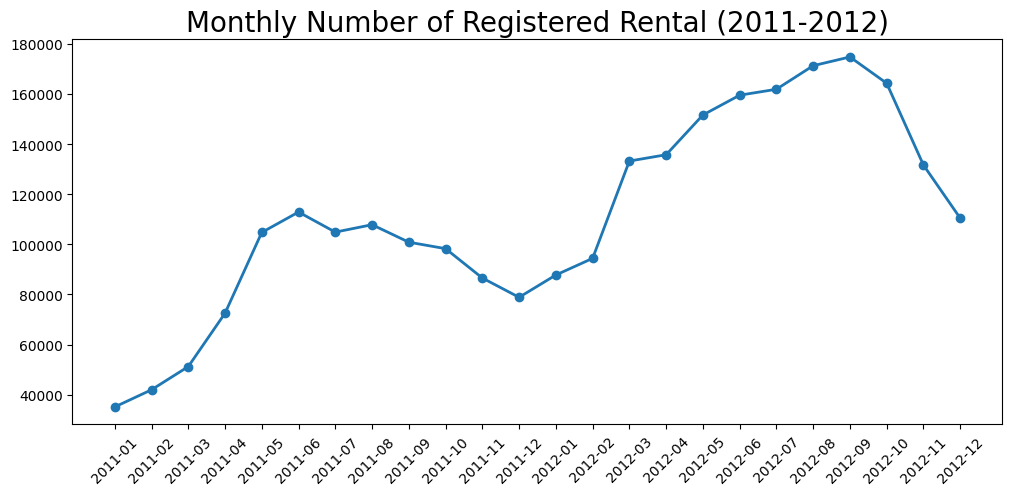

In [36]:
%matplotlib inline

plt.figure(figsize=(12, 5))
plt.plot(monthly_df["month"], monthly_df["registered"], marker="o", linewidth=2)
plt.title("Monthly Number of Registered Rental (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Explore correlation and covariance


In [49]:
day_df.corr()[["temp", "atemp", "hum", "windspeed"]].iloc[-1]

temp         0.627494
atemp        0.631066
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64

**Insight:**

- Pada periode 2011-2012, tanggal dengan rental keseluruhan paling banyak adalah 15 September 2012 sementara tanggal dengan rental keseluruhan paling sedikit adalah 29 Oktober 2012
- Pada periode 2011-2012, tanggal dengan rental casual paling banyak adalah 19 Mei 2012 sementara tanggal dengan rental casual paling sedikit adalah 29 Oktober 2012
- Pada periode 2011-2012, tanggal dengan rental registered paling banyak adalah 26 September 2012 sementara tanggal dengan rental registered paling sedikit adalah 29 Oktober 2012
- Pada tahun 2011, rental paling banyak dilakukan pada musim gugur (fall) dan begitu pula pada tahun 2012. Sementara itu, baik pada tahun 2011 maupun 2012, rental paling sedikit dilakukan pada musim semi (springer)
- Selama periode 2011-2012, rental paling banyak dilakukan pada September 2012 dengan 218.573 rental dan paling sedikit dilakukan pada Januari 2011
- Jumlah rental bulanan selalu meningkat pada bulan Januari hingga Mei dan selalu menurun pada bulan September hingga Desember
- Secara garis besar, jumlah rental bulanan memiliki tren meningkat dilihat dari jumlah rental bulanan pada tahun 2012 cenderung lebih tinggi dari bulan yang sama pada tahun 2011
- Mirip halnya dengan jumlah rental keseluruhan, secara garis besar,jumlah rental registered bulanan memiliki tren meningkat dilihat dari jumlahnya pada tahun 2012 cenderung lebih tinggi dari bulan yang sama pada tahun 2011
- Korelasi variabel "temp" dan "atemp" dengan jumlah rental keseluruhan (cnt) cukup tinggi, yaitu sekitar 0,63. Beda halnya dengan variabel "hum" dan "windspeed" yang masing-masing hanya sekitar -0,1 dan -0,23


## Visualization & Explanatory Analysis


### Pada tanggal berapa masing-masing rental keseluruhan, rental casual, dan rental registered paling banyak dilakukan pada periode 2011-2012?


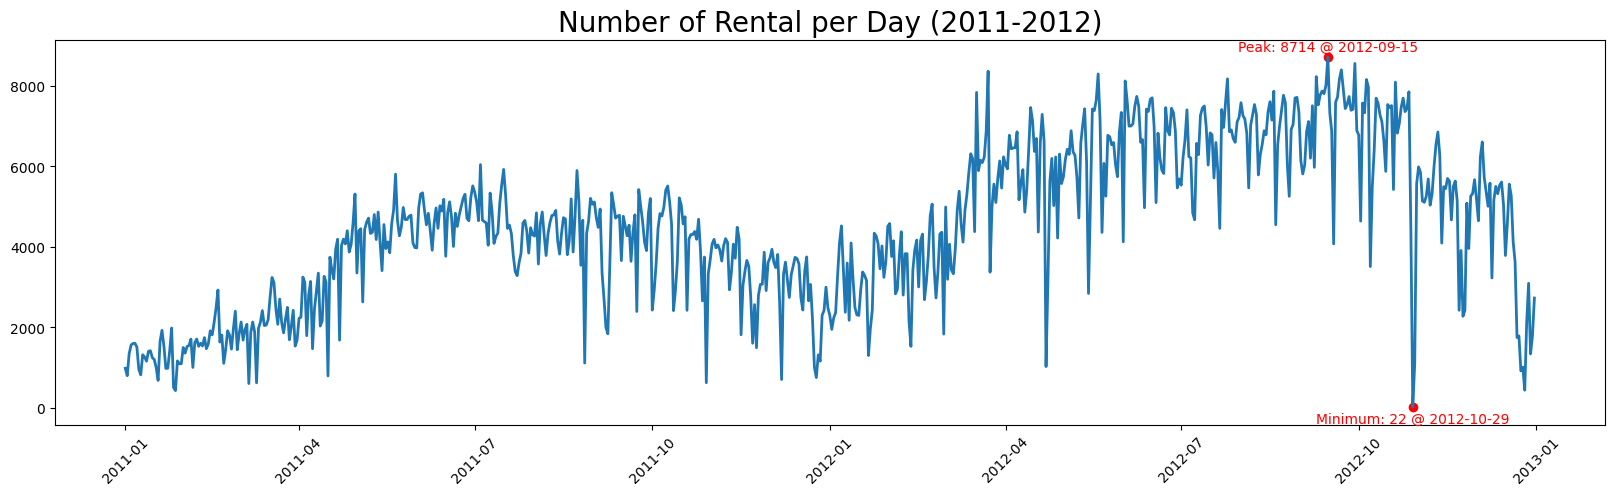

In [38]:
%matplotlib inline
minimum_cnt = day_df[day_df['cnt'] == day_df.cnt.min()]
maximum_cnt = day_df[day_df['cnt'] == day_df.cnt.max()]

plt.figure(figsize=(20, 5))
plt.plot(day_df["dteday"], day_df["cnt"], linewidth=2)
plt.scatter(
    day_df[day_df["cnt"] == day_df.cnt.max()]["dteday"].item(),
    day_df[day_df["cnt"] == day_df.cnt.max()]["cnt"].item(),
    color="red",
)
plt.text(
    day_df[day_df["cnt"] == day_df.cnt.max()]["dteday"].item(),
    day_df[day_df["cnt"] == day_df.cnt.max()]["cnt"].item() + 150,
    f"Peak: {maximum_cnt['cnt'].item()} @ {maximum_cnt['dteday'].item().strftime('%Y-%m-%d')}",
    color="red",
    fontsize=10,
    ha="center",
)
plt.scatter(
    day_df[day_df["cnt"] == day_df.cnt.min()]["dteday"].item(),
    day_df[day_df["cnt"] == day_df.cnt.min()]["cnt"].item(),
    color="red",
)
plt.text(
    day_df[day_df["cnt"] == day_df.cnt.min()]["dteday"].item(),
    day_df[day_df["cnt"] == day_df.cnt.min()]["cnt"].item() - 400,
    f"Minimum: {minimum_cnt['cnt'].item()} @ {minimum_cnt['dteday'].item().strftime('%Y-%m-%d')}",
    color="red",
    fontsize=10,
    ha="center",
)
plt.title("Number of Rental per Day (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

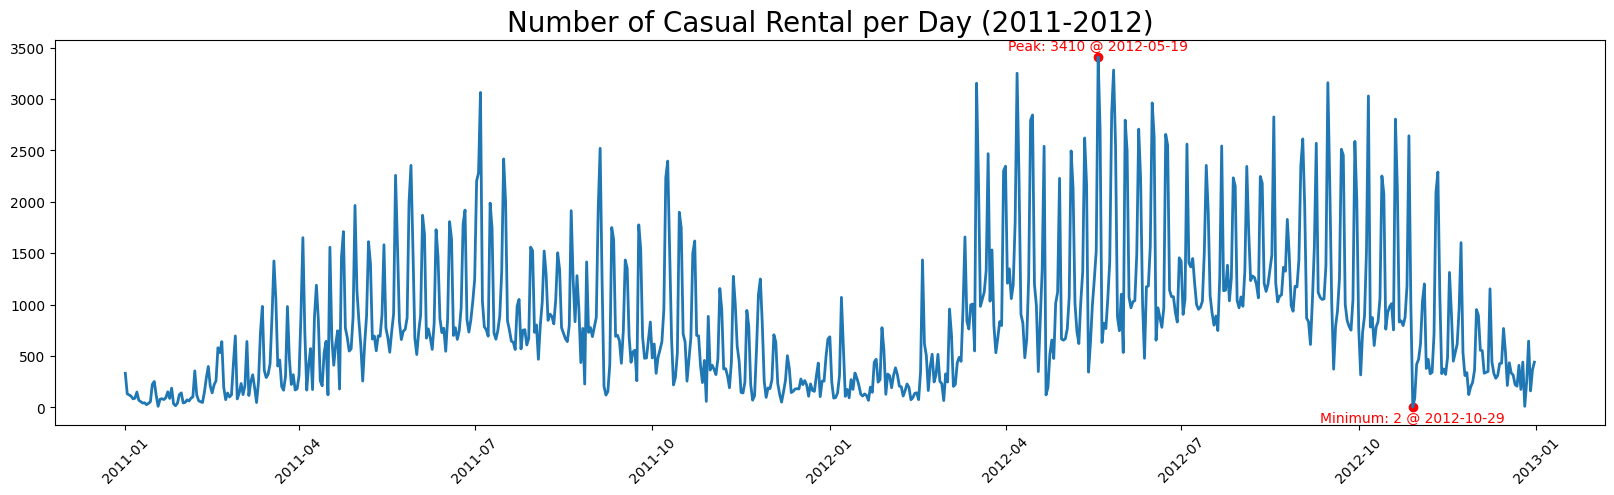

In [39]:
%matplotlib inline
minimum_casual = day_df[day_df['casual'] == day_df.casual.min()]
maximum_casual = day_df[day_df['casual'] == day_df.casual.max()]

plt.figure(figsize=(20, 5))
plt.plot(day_df["dteday"], day_df["casual"], linewidth=2)
plt.scatter(
    day_df[day_df["casual"] == day_df.casual.max()]["dteday"].item(),
    day_df[day_df["casual"] == day_df.casual.max()]["casual"].item(),
    color="red",
)
plt.text(
    day_df[day_df["casual"] == day_df.casual.max()]["dteday"].item(),
    day_df[day_df["casual"] == day_df.casual.max()]["casual"].item() + 70,
    f"Peak: {maximum_casual['casual'].item()} @ {maximum_casual['dteday'].item().strftime('%Y-%m-%d')}",
    color="red",
    fontsize=10,
    ha="center",
)
plt.scatter(
    day_df[day_df["casual"] == day_df.casual.min()]["dteday"].item(),
    day_df[day_df["casual"] == day_df.casual.min()]["casual"].item(),
    color="red",
)
plt.text(
    day_df[day_df["casual"] == day_df.casual.min()]["dteday"].item(),
    day_df[day_df["casual"] == day_df.casual.min()]["casual"].item() - 150,
    f"Minimum: {minimum_casual['casual'].item()} @ {minimum_casual['dteday'].item().strftime('%Y-%m-%d')}",
    color="red",
    fontsize=10,
    ha="center",
)
plt.title("Number of Casual Rental per Day (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

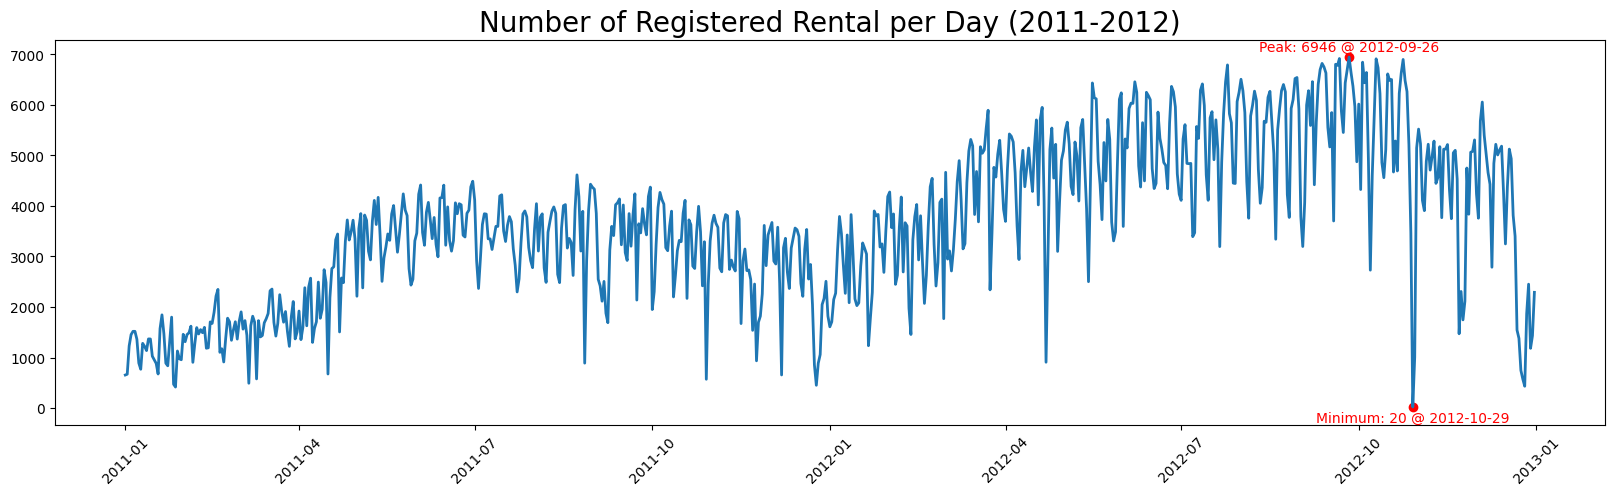

In [40]:
%matplotlib inline
minimum_registered = day_df[day_df['registered'] == day_df.registered.min()]
maximum_registered = day_df[day_df['registered'] == day_df.registered.max()]

plt.figure(figsize=(20, 5))
plt.plot(day_df["dteday"], day_df["registered"], linewidth=2)
plt.scatter(
    day_df[day_df["registered"] == day_df.registered.max()]["dteday"].item(),
    day_df[day_df["registered"] == day_df.registered.max()]["registered"].item(),
    color="red",
)
plt.text(
    day_df[day_df["registered"] == day_df.registered.max()]["dteday"].item(),
    day_df[day_df["registered"] == day_df.registered.max()]["registered"].item() + 120,
    f"Peak: {maximum_registered['registered'].item()} @ {maximum_registered['dteday'].item().strftime('%Y-%m-%d')}",
    color="red",
    fontsize=10,
    ha="center",
)
plt.scatter(
    day_df[day_df["registered"] == day_df.registered.min()]["dteday"].item(),
    day_df[day_df["registered"] == day_df.registered.min()]["registered"].item(),
    color="red",
)
plt.text(
    day_df[day_df["registered"] == day_df.registered.min()]["dteday"].item(),
    day_df[day_df["registered"] == day_df.registered.min()]["registered"].item() - 300,
    f"Minimum: {minimum_registered['registered'].item()} @ {minimum_registered['dteday'].item().strftime('%Y-%m-%d')}",
    color="red",
    fontsize=10,
    ha="center",
)
plt.title("Number of Registered Rental per Day (2011-2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pada musim apa rental paling banyak dan paling sedikit dilakukan selama periode 2011-2012?


In [41]:
day_df_by_season = day_df.groupby(by="season").agg(
    {"casual": "sum", "registered": "sum", "cnt": "sum"}
)
mapping = {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df_by_season.index = day_df_by_season.index.map(mapping)
day_df_by_season = day_df_by_season.reset_index()
day_df_by_season

,season,casual,registered,cnt
0,Springer,60622,410726,471348
1,Summer,203522,715067,918589
2,Fall,226091,835038,1061129
3,Winter,129782,711831,841613


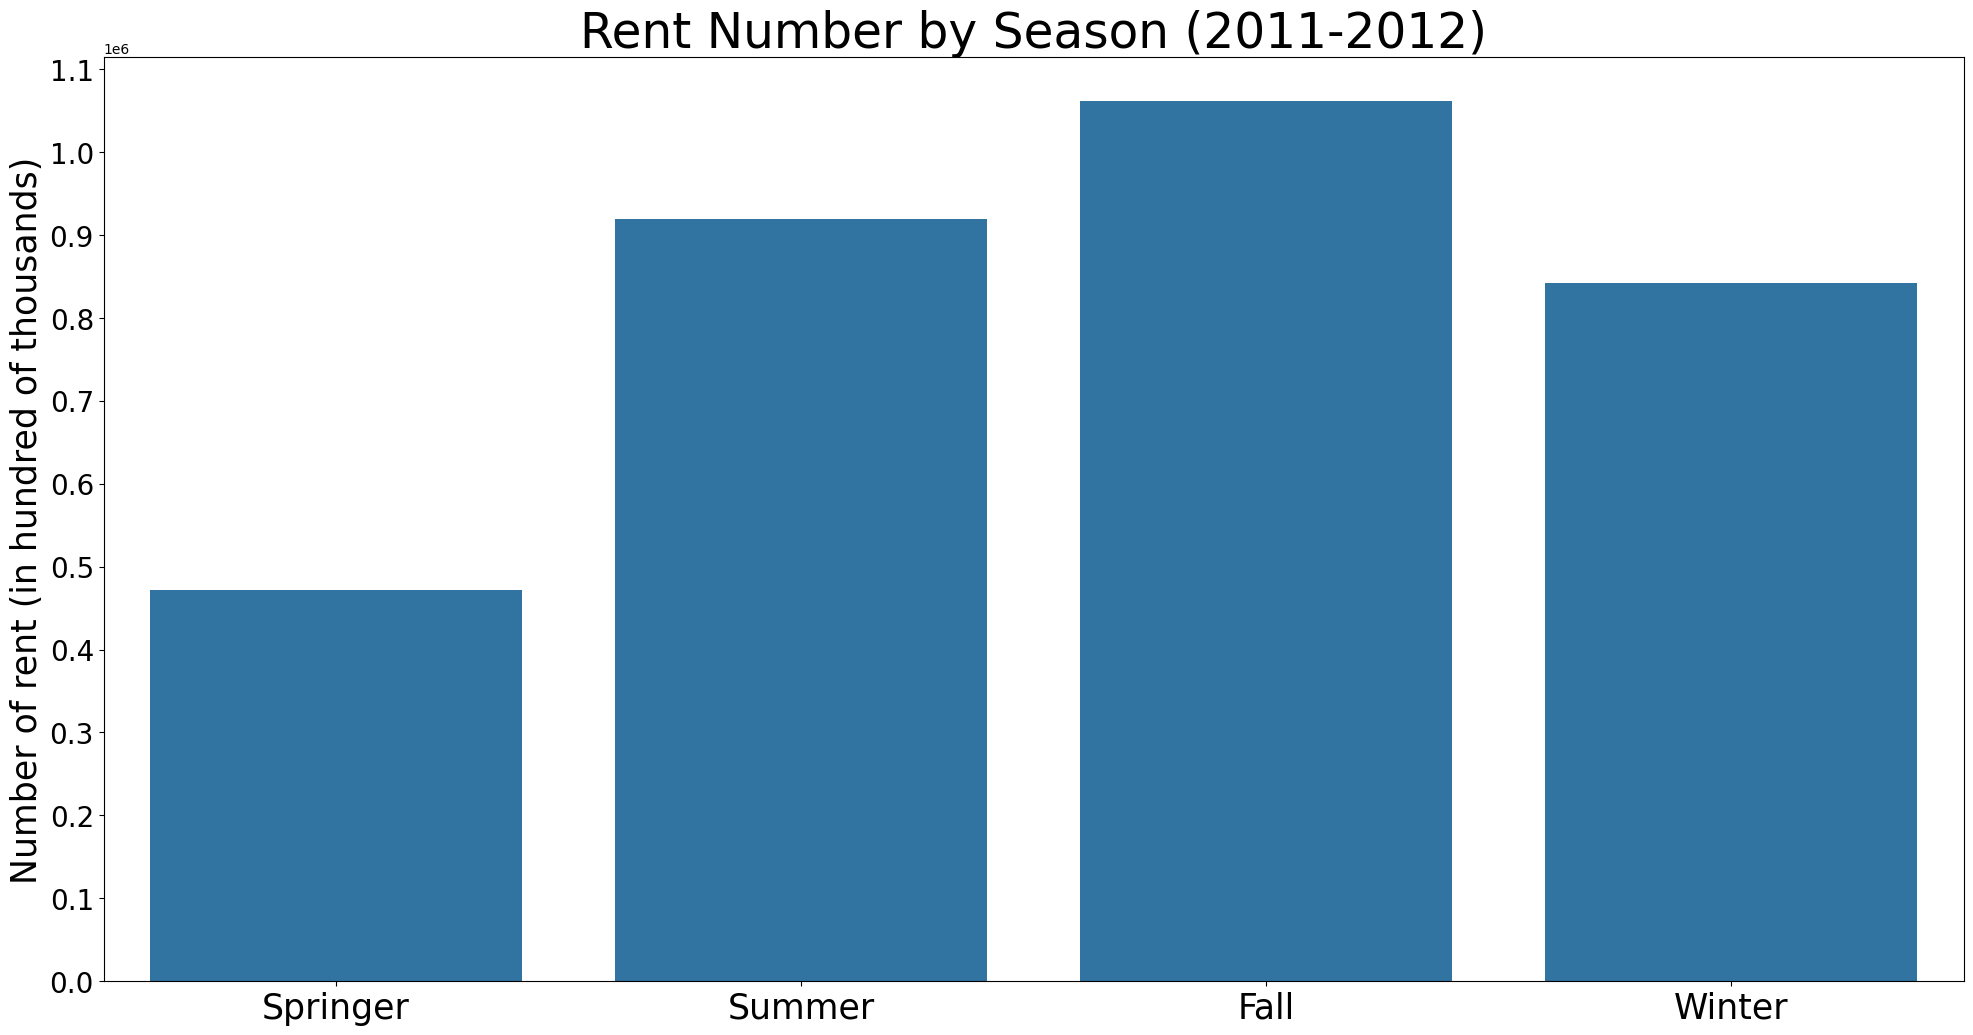

In [42]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 12))

sns.barplot(
    x="season",
    y="cnt",
    data=day_df_by_season,
    ax=ax,
)
ax.set_ylabel("Number of rent (in hundred of thousands)", fontsize=25)
ax.set_xlabel(None)
ax.set_title("Rent Number by Season (2011-2012)", loc="center", fontsize=35)
ax.set_yticks(np.arange(0, 1_200_000, 100_000))
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=25)

plt.show()

### Bagaimana korelasi temperatur, temperatur yang dirasakan kelembapan, dan kecepatan angin dengan banyak rental harian yang dilakukan selama periode 2011-2012?


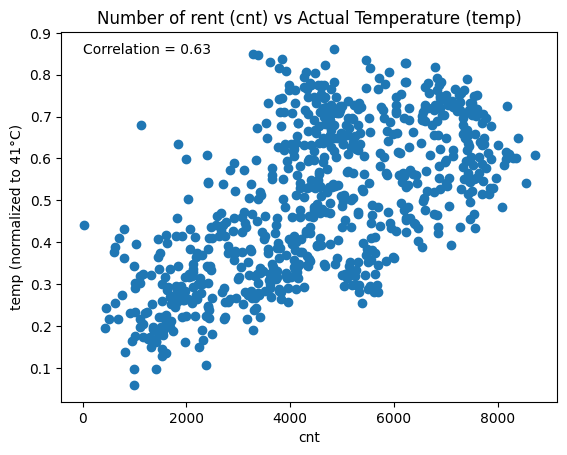

In [43]:
%matplotlib inline

plt.scatter(day_df["cnt"], day_df["temp"])
plt.text(
    0,
    0.85,
    f"Correlation = {round(day_df.corr()[['temp', 'atemp', 'hum', 'windspeed']].iloc[-1]['temp'], 2)}",
    ha="left",
)
plt.title('Number of rent (cnt) vs Actual Temperature (temp)')
plt.xlabel('cnt')
plt.ylabel('temp (normalized to 41°C)')
plt.show()

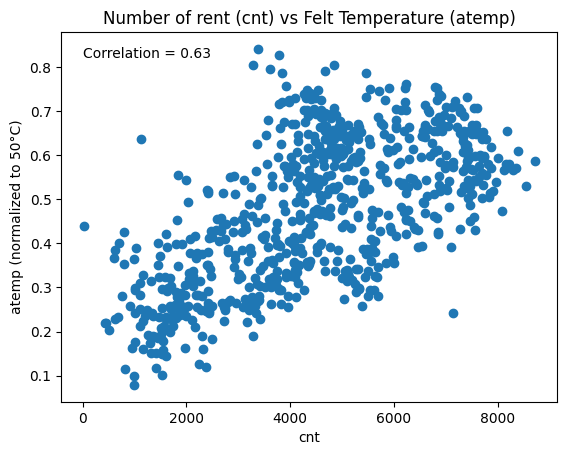

In [44]:
%matplotlib inline

plt.scatter(day_df["cnt"], day_df["atemp"])
plt.text(
    0,
    0.82,
    f"Correlation = {round(day_df.corr()[['temp', 'atemp', 'hum', 'windspeed']].iloc[-1]['atemp'], 2)}",
    ha="left",
)
plt.title('Number of rent (cnt) vs Felt Temperature (atemp)')
plt.xlabel('cnt')
plt.ylabel('atemp (normalized to 50°C)')
plt.show()

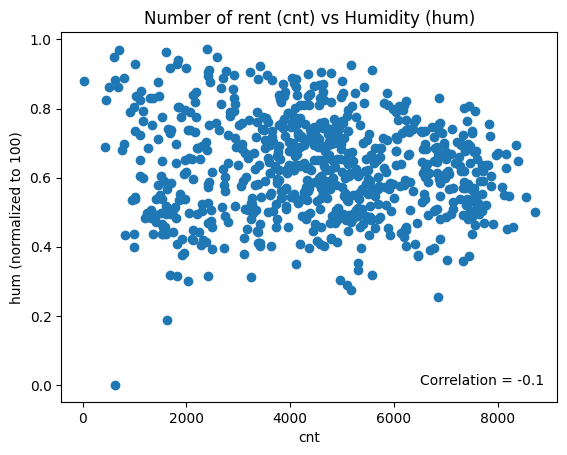

In [45]:
%matplotlib inline

plt.scatter(day_df["cnt"], day_df["hum"])
plt.text(
    7700,
    0,
    f"Correlation = {round(day_df.corr()[['temp', 'atemp', 'hum', 'windspeed']].iloc[-1]['hum'], 2)}",
    ha="center",
)
plt.title('Number of rent (cnt) vs Humidity (hum)')
plt.xlabel('cnt')
plt.ylabel('hum (normalized to 100)')
plt.show()

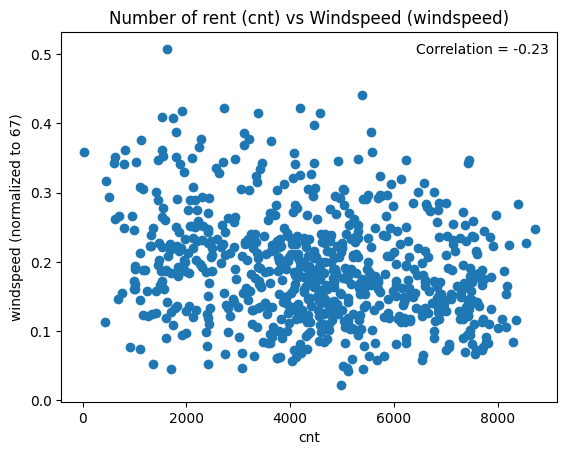

In [46]:
%matplotlib inline

plt.scatter(day_df["cnt"], day_df["windspeed"])
plt.text(
    7700,
    0.5,
    f"Correlation = {round(day_df.corr()[['temp', 'atemp', 'hum', 'windspeed']].iloc[-1]['windspeed'], 2)}",
    ha="center",
)
plt.title('Number of rent (cnt) vs Windspeed (windspeed)')
plt.xlabel('cnt')
plt.ylabel('windspeed (normalized to 67)')
plt.show()

**Insight:**

- Tren harian dari masing-masing jumlah rental keseluruhan, jumlah rental casual, dan jumlah rental registered divisualisasikan dengan line chart. Titik data dengan jumlah tertinggi dan terendah di-highlight dengan titik berwarna merah menggunakan scatterplot
- Jumlah rental berdasarkan musim divisualisasikan dengan menggunakan bar chart
- Beberapa scatterplot dibuat untuk memvisualisasikan korelasi antara variabel "temp", "atemp", "hum", dan "windspeed" dengan variabel "cnt". Nilai korelasi juga ditunjukkan pada masing-masing scatterplot. Terlihat bahwa korelasi bersesuaian dengan ke-"linear"-an pola pada scatterplot. Ke-"linear"-an pola dari hubungan dengan korelasi yang lebih tinggi terlihat lebih jelas


## Conclusion


Pada tanggal berapa masing-masing rental keseluruhan, rental casual, dan rental registered paling banyak dan paling sedikit dilakukan pada periode 2011-2012?

- Pada periode 2011-2012, tanggal dengan rental keseluruhan paling banyak adalah 15 September 2012 sementara tanggal dengan rental keseluruhan paling sedikit adalah 29 Oktober 2012, tanggal dengan rental casual paling banyak adalah 19 Mei 2012 sementara tanggal dengan rental casual paling sedikit adalah 29 Oktober 2012, serta tanggal dengan rental registered paling banyak adalah 26 September 2012 sementara tanggal dengan rental registered paling sedikit adalah 29 Oktober 2012

Pada musim apa rental paling banyak dan paling sedikit dilakukan selama periode 2011-2012?

- Pada tahun 2011, rental paling banyak dilakukan pada musim gugur (fall) dan begitu pula pada tahun 2012. Sementara itu, baik pada tahun 2011 maupun 2012, rental paling sedikit dilakukan pada musim semi (springer)

Bagaimana korelasi temperatur, temperatur yang dirasakan kelembapan, dan kecepatan angin dengan banyak rental harian yang dilakukan selama periode 2011-2012?

- Korelasi variabel "temp" dan "atemp" dengan jumlah rental keseluruhan (cnt) cukup tinggi, yaitu sekitar 0,63. Beda halnya dengan variabel "hum" dan "windspeed" yang masing-masing hanya sekitar -0,1 dan -0,23

Bagaimana tren bulanan rental selama 2011-2012?

- Selama periode 2011-2012, rental paling banyak dilakukan pada September 2012 dengan 218.573 rental dan paling sedikit dilakukan pada Januari 2011
- Jumlah rental bulanan selalu meningkat pada bulan Januari hingga Mei dan selalu menurun pada bulan September hingga Desember
- Secara garis besar, jumlah rental bulanan memiliki tren meningkat dilihat dari jumlah rental bulanan pada tahun 2012 cenderung lebih tinggi dari bulan yang sama pada tahun 2011

Bagaimana tren bulanan rental registered selama 2011-2012?

- Secara garis besar,jumlah rental registered bulanan juga memiliki tren meningkat dilihat dari jumlahnya pada tahun 2012 cenderung lebih tinggi dari bulan yang sama pada tahun 2011


In [51]:
type(day_df.iloc[0]['dteday'])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
day_df.to_csv('./dashboard/main_data.csv')